In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [3]:
df = pd.DataFrame(np.random.rand(60).reshape(10, 6))
df

,0,1,2,3,4,5
0,0.409863,0.826921,0.661878,0.835014,0.286849,0.371118
1,0.406301,0.653360,0.104756,0.123662,0.432754,0.248029
2,0.829558,0.176727,0.372554,0.947743,0.198879,0.345015
3,0.249730,0.290869,0.938229,0.101524,0.271239,0.327685
4,0.882195,0.264326,0.422358,0.524518,0.975874,0.633777
5,0.520875,0.409979,0.267501,0.743796,0.949663,0.592086
6,0.166384,0.236131,0.609326,0.491145,0.991859,0.356511
7,0.774285,0.391593,0.647098,0.883468,0.825776,0.901390
8,0.687063,0.703096,0.691452,0.190800,0.103514,0.785797
9,0.976183,0.794392,0.698660,0.677602,0.538409,0.839732


In [4]:
df.to_csv("my_data_frame.csv", index=False)

In [5]:
df = pd.read_csv("my_data_frame.csv")
df

,0,1,2,3,4,5
0,0.409863,0.826921,0.661878,0.835014,0.286849,0.371118
1,0.406301,0.653360,0.104756,0.123662,0.432754,0.248029
2,0.829558,0.176727,0.372554,0.947743,0.198879,0.345015
3,0.249730,0.290869,0.938229,0.101524,0.271239,0.327685
4,0.882195,0.264326,0.422358,0.524518,0.975874,0.633777
5,0.520875,0.409979,0.267501,0.743796,0.949663,0.592086
6,0.166384,0.236131,0.609326,0.491145,0.991859,0.356511
7,0.774285,0.391593,0.647098,0.883468,0.825776,0.901390
8,0.687063,0.703096,0.691452,0.190800,0.103514,0.785797
9,0.976183,0.794392,0.698660,0.677602,0.538409,0.839732


In [6]:
ddf = dd.read_csv("my_data_frame.csv")
ddf

,0,1,2,3,4,5
npartitions=1,,,,,,
,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...


In [7]:
ddf.compute()

,0,1,2,3,4,5
0,0.409863,0.826921,0.661878,0.835014,0.286849,0.371118
1,0.406301,0.653360,0.104756,0.123662,0.432754,0.248029
2,0.829558,0.176727,0.372554,0.947743,0.198879,0.345015
3,0.249730,0.290869,0.938229,0.101524,0.271239,0.327685
4,0.882195,0.264326,0.422358,0.524518,0.975874,0.633777
5,0.520875,0.409979,0.267501,0.743796,0.949663,0.592086
6,0.166384,0.236131,0.609326,0.491145,0.991859,0.356511
7,0.774285,0.391593,0.647098,0.883468,0.825776,0.901390
8,0.687063,0.703096,0.691452,0.190800,0.103514,0.785797
9,0.976183,0.794392,0.698660,0.677602,0.538409,0.839732


In [9]:
ddf = dd.from_pandas(df, npartitions=3)
ddf

,0,1,2,3,4,5
npartitions=3,,,,,,
0,float64,float64,float64,float64,float64,float64
4,...,...,...,...,...,...
7,...,...,...,...,...,...
9,...,...,...,...,...,...


In [10]:
ddf.divisions

(0, 4, 7, 9)

In [11]:
ddf.compute()

,0,1,2,3,4,5
0,0.409863,0.826921,0.661878,0.835014,0.286849,0.371118
1,0.406301,0.653360,0.104756,0.123662,0.432754,0.248029
2,0.829558,0.176727,0.372554,0.947743,0.198879,0.345015
3,0.249730,0.290869,0.938229,0.101524,0.271239,0.327685
4,0.882195,0.264326,0.422358,0.524518,0.975874,0.633777
5,0.520875,0.409979,0.267501,0.743796,0.949663,0.592086
6,0.166384,0.236131,0.609326,0.491145,0.991859,0.356511
7,0.774285,0.391593,0.647098,0.883468,0.825776,0.901390
8,0.687063,0.703096,0.691452,0.190800,0.103514,0.785797
9,0.976183,0.794392,0.698660,0.677602,0.538409,0.839732


In [12]:
narr = np.random.randint(0, 10, 100).reshape(10, 10)
narr

array([[7, 9, 7, 3, 8, 9, 9, 3, 0, 5],
       [2, 2, 8, 5, 3, 6, 4, 2, 4, 4],
       [8, 8, 0, 6, 9, 3, 0, 6, 5, 8],
       [7, 8, 7, 9, 2, 6, 2, 7, 2, 2],
       [9, 8, 2, 2, 2, 0, 7, 0, 7, 3],
       [7, 5, 4, 3, 8, 1, 9, 9, 9, 6],
       [7, 0, 4, 2, 8, 0, 1, 3, 6, 8],
       [8, 6, 8, 8, 5, 2, 9, 0, 8, 9],
       [3, 7, 6, 7, 4, 3, 7, 4, 7, 8],
       [8, 7, 0, 0, 4, 6, 4, 5, 6, 9]])

In [13]:
darr = da.from_array(narr, chunks=(5, 5))
darr

dask.array<array, shape=(10, 10), dtype=int64, chunksize=(5, 5), chunktype=numpy.ndarray>

In [14]:
darr.chunks

((5, 5), (5, 5))

In [15]:
darr.compute()

array([[7, 9, 7, 3, 8, 9, 9, 3, 0, 5],
       [2, 2, 8, 5, 3, 6, 4, 2, 4, 4],
       [8, 8, 0, 6, 9, 3, 0, 6, 5, 8],
       [7, 8, 7, 9, 2, 6, 2, 7, 2, 2],
       [9, 8, 2, 2, 2, 0, 7, 0, 7, 3],
       [7, 5, 4, 3, 8, 1, 9, 9, 9, 6],
       [7, 0, 4, 2, 8, 0, 1, 3, 6, 8],
       [8, 6, 8, 8, 5, 2, 9, 0, 8, 9],
       [3, 7, 6, 7, 4, 3, 7, 4, 7, 8],
       [8, 7, 0, 0, 4, 6, 4, 5, 6, 9]])

In [16]:
df['1'].mean()

0.47473946966282493

In [17]:
m = ddf['1'].mean()

In [18]:
m.compute()

0.474739469662825

In [19]:
mm = np.mean(darr)
mm.compute()

5.13

In [20]:
mm.dask

HighLevelGraph with 3 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7ff9e1f18550>
 0. array-211f7decc2984d23151660d0995684a2
 1. mean_chunk-32b17547a2fc1213d53deb4026b9722f
 2. mean_agg-aggregate-d6b2a60ba789a309e1b2f951acf1057e

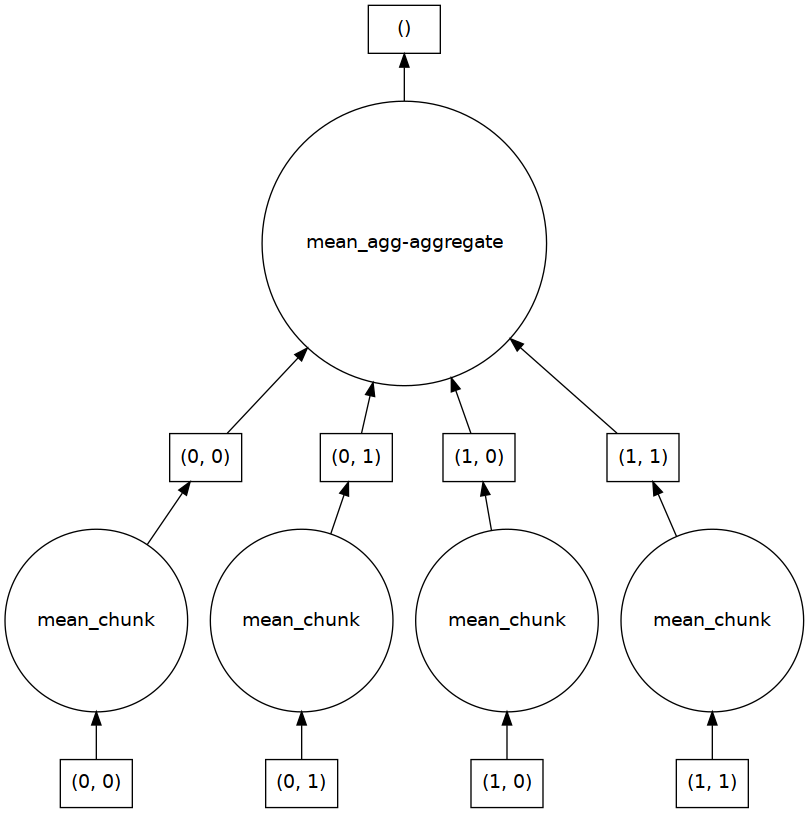

In [21]:
mm.visualize()

In [22]:
import dask

@dask.delayed
def doubled(x):
    return 2 * x

In [23]:
doubled(darr)

Delayed('doubled-e8a4b90d-3b1c-489c-9aad-27e1f62dd817')

In [24]:
d = doubled(darr)
d.compute()

array([[14, 18, 14,  6, 16, 18, 18,  6,  0, 10],
       [ 4,  4, 16, 10,  6, 12,  8,  4,  8,  8],
       [16, 16,  0, 12, 18,  6,  0, 12, 10, 16],
       [14, 16, 14, 18,  4, 12,  4, 14,  4,  4],
       [18, 16,  4,  4,  4,  0, 14,  0, 14,  6],
       [14, 10,  8,  6, 16,  2, 18, 18, 18, 12],
       [14,  0,  8,  4, 16,  0,  2,  6, 12, 16],
       [16, 12, 16, 16, 10,  4, 18,  0, 16, 18],
       [ 6, 14, 12, 14,  8,  6, 14,  8, 14, 16],
       [16, 14,  0,  0,  8, 12,  8, 10, 12, 18]])

In [1]:
from dask.distributed import Client
client = Client()

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

x = 50 * np.random.random((30, 1))
y = 0.3 * x + 1.0 + np.random.normal(size=x.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
print(model.intercept_)
print(model.coef_)

[1.4268142]
[[0.30140182]]


In [15]:
y_new = model.predict(x_test)

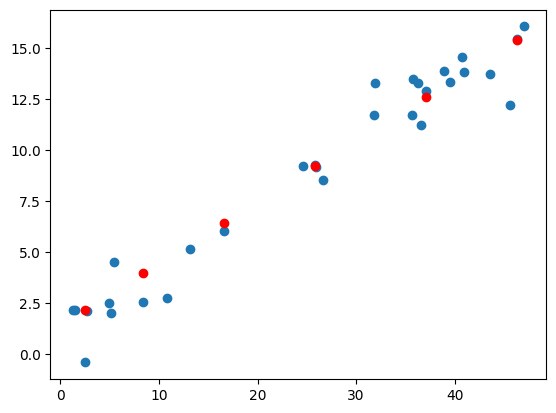

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y)
plt.scatter(x_test, y_new, c='red')

In [17]:
model.score(x_train, y_train)

0.9487936149032521

In [18]:
model.score(x_test, y_test)

0.952662804755945

In [19]:
from dask_ml.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [20]:
from dask_ml.linear_model import LinearRegression
model = LinearRegression()

In [21]:
import joblib
from joblib import parallel_backend

In [22]:
with parallel_backend('dask'):
    model.fit(x_train, y_train)
    y_new = model.predict(x_test)

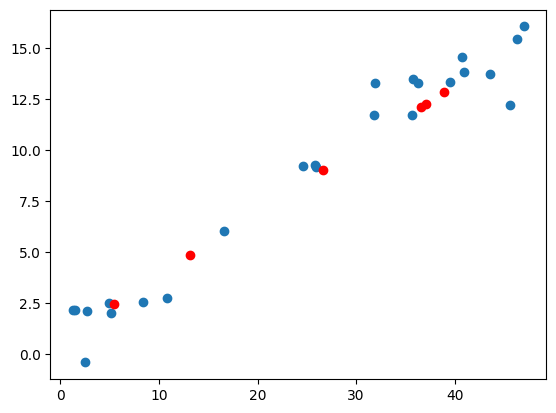

In [23]:
plt.figure()
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_new, c='red')

In [1]:
import torch
torch.__version__

'2.0.1+cu117'

In [2]:
torch.cuda.is_available()

True